In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision import transforms

# Demo extraída y adaptada de https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/



In [ ]:

# Cargamos el modelo ya entrenado. Le va a entrar una imagen con 3 canales y va a devolver una imagen con 1 canal. Es decir, va a realizar segmentación binaria.
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

filename = r'Brain.png'  # Link a la imagen: https://raw.githubusercontent.com/mateuszbuda/brain-segmentation-pytorch/master/assets/TCGA_CS_4944.png



# Cargamos la imagen y la preprocesamos

input_image = cv2.imread(filename)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

# la pasamos por el modelo. El torch.no_grad() significa que no vamos a calcular gradientes, ya que no vamos a entrenar el modelo.
with torch.no_grad():
    output = model(input_batch)


print(output.shape) # la imagen de salida es de tamaño 1x1xhxw. La primera dimensión es el batch size, la segunda es el número de canales, y las dos últimas son el tamaño de la imagen.

Using cache found in C:\Users\jisal/.cache\torch\hub\mateuszbuda_brain-segmentation-pytorch_master


torch.Size([1, 1, 256, 256])


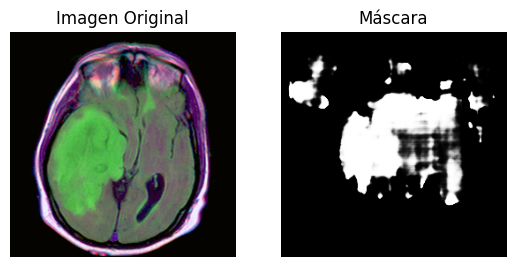

In [3]:
mask = output[0].cpu().numpy().squeeze() # Cogemos la primera imagen del batch, la pasamos a numpy y a la cpu si es que hemos usado CUDA.

# Mostramos la imagen original y la máscara en la misma figura
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')
plt.axis('off')

plt.show()

